# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

In [65]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
ames.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [67]:
# Your code here
ames2 = ames.loc[:, ((ames.dtypes!='object') & (ames.nunique()>20))]
ames2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  GarageYrBlt    1379 non-null   float64
 15  GarageArea     1460 non-null   int64  
 16  WoodDeckSF     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  Enclosed

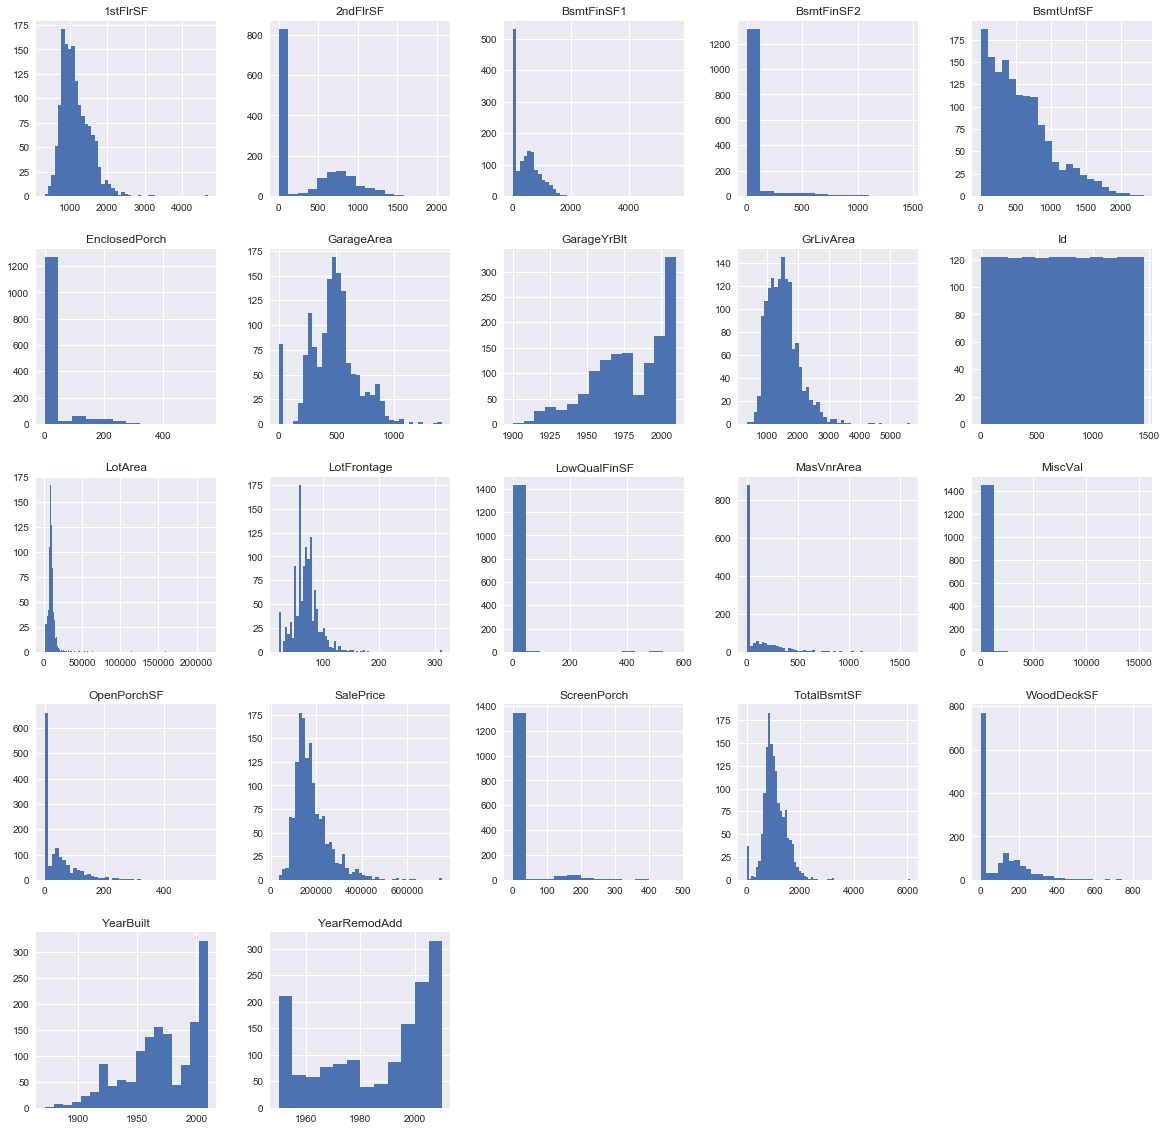

In [68]:
ames2.hist(figsize=(20,20), bins='auto')
plt.show()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [69]:
ames2.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

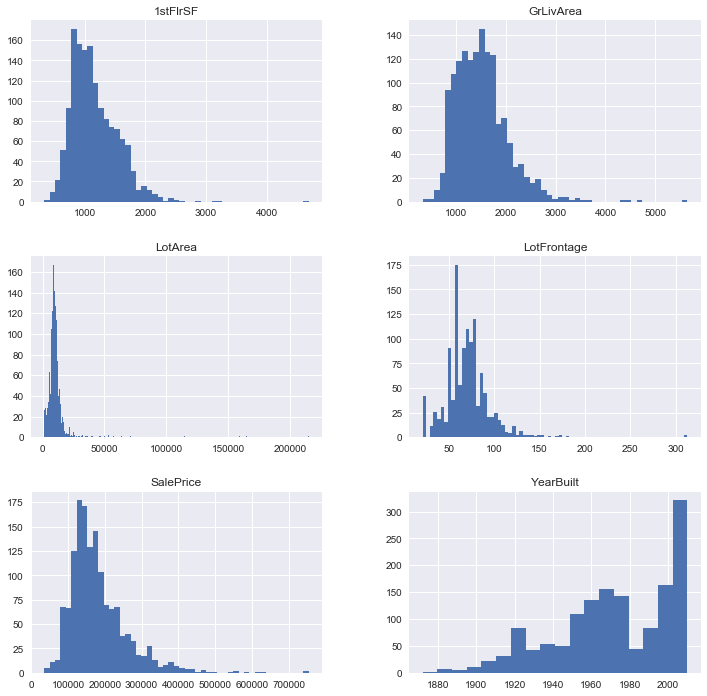

In [70]:
# Select non zero-inflated continuous features as ames_cont
columns_cont = ['LotFrontage', 'LotArea', 'YearBuilt','1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = ames[columns_cont]
ames_cont.hist(figsize=(12,12), bins='auto')
plt.show()

## Perform log transformations for the variables where it makes sense

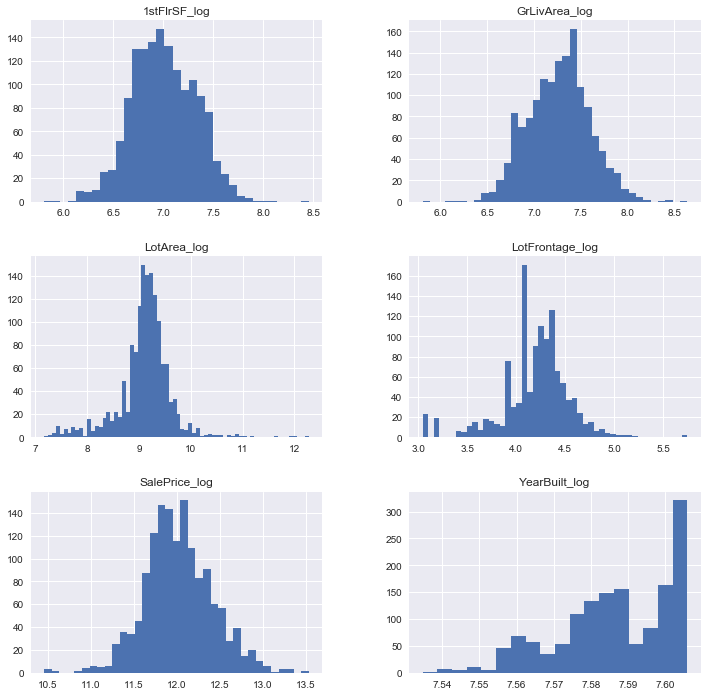

In [71]:
# Your code here
columns_cont_log = [col+'_log' for col in columns_cont]
columns_cont_log

ames_cont_log = np.log(ames_cont)
ames_cont_log.columns = columns_cont_log

ames_cont_log.hist(figsize=(12,12), bins='auto')
plt.show()

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [72]:
#pip install scikit-learn
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

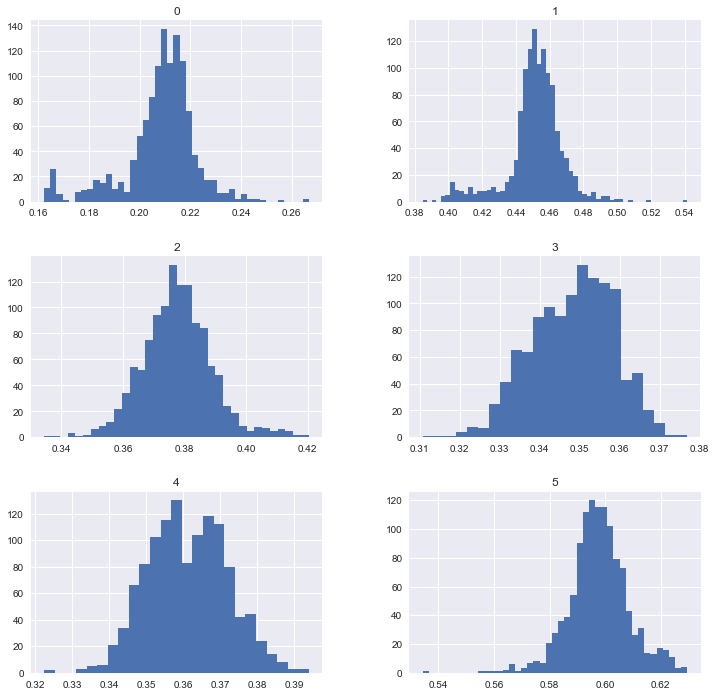

In [102]:
#Remove the NAN values
features_final = pd.DataFrame(normalizer.transform(ames_cont_log.dropna()))  #ames_cont_log is a dataframe
features_final.hist(figsize=(12,12), bins='auto')
plt.show()

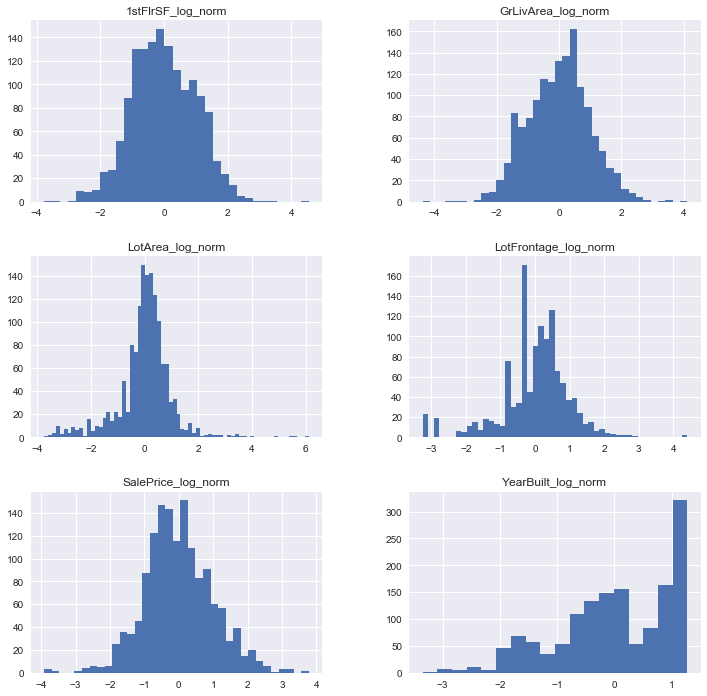

In [63]:
#2nd method
features_final = pd.DataFrame()

for col in columns_cont_log:
    ds = ames_cont_log[col]
    features_final[col+'_norm'] = (ds - ds.mean())/ds.std()

features_final.hist(figsize=(12,12), bins='auto')
plt.show()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!